In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun, G
import astropy.units as u
import tqdm
from matplotlib import colors 
import pickle
import os

sys.path.append('/lustre/hpc/astro/kxm508/codes/python_dispatch/pipeline_scripts/')
from pipeline_main import pipeline, serialize_directory
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4

save_folder = '/groups/astro/kxm508/codes/python_dispatch/graphics/'


In [8]:
saved_as = ['122', 'old13', '225_2', '178']
plot_data = {key: serialize_directory(filename = 'accretion_spheres_s' + key, store = False) for key in saved_as}

In [9]:
sink_names = ['122', '13', '225', '178']

122
old13
225_2
178


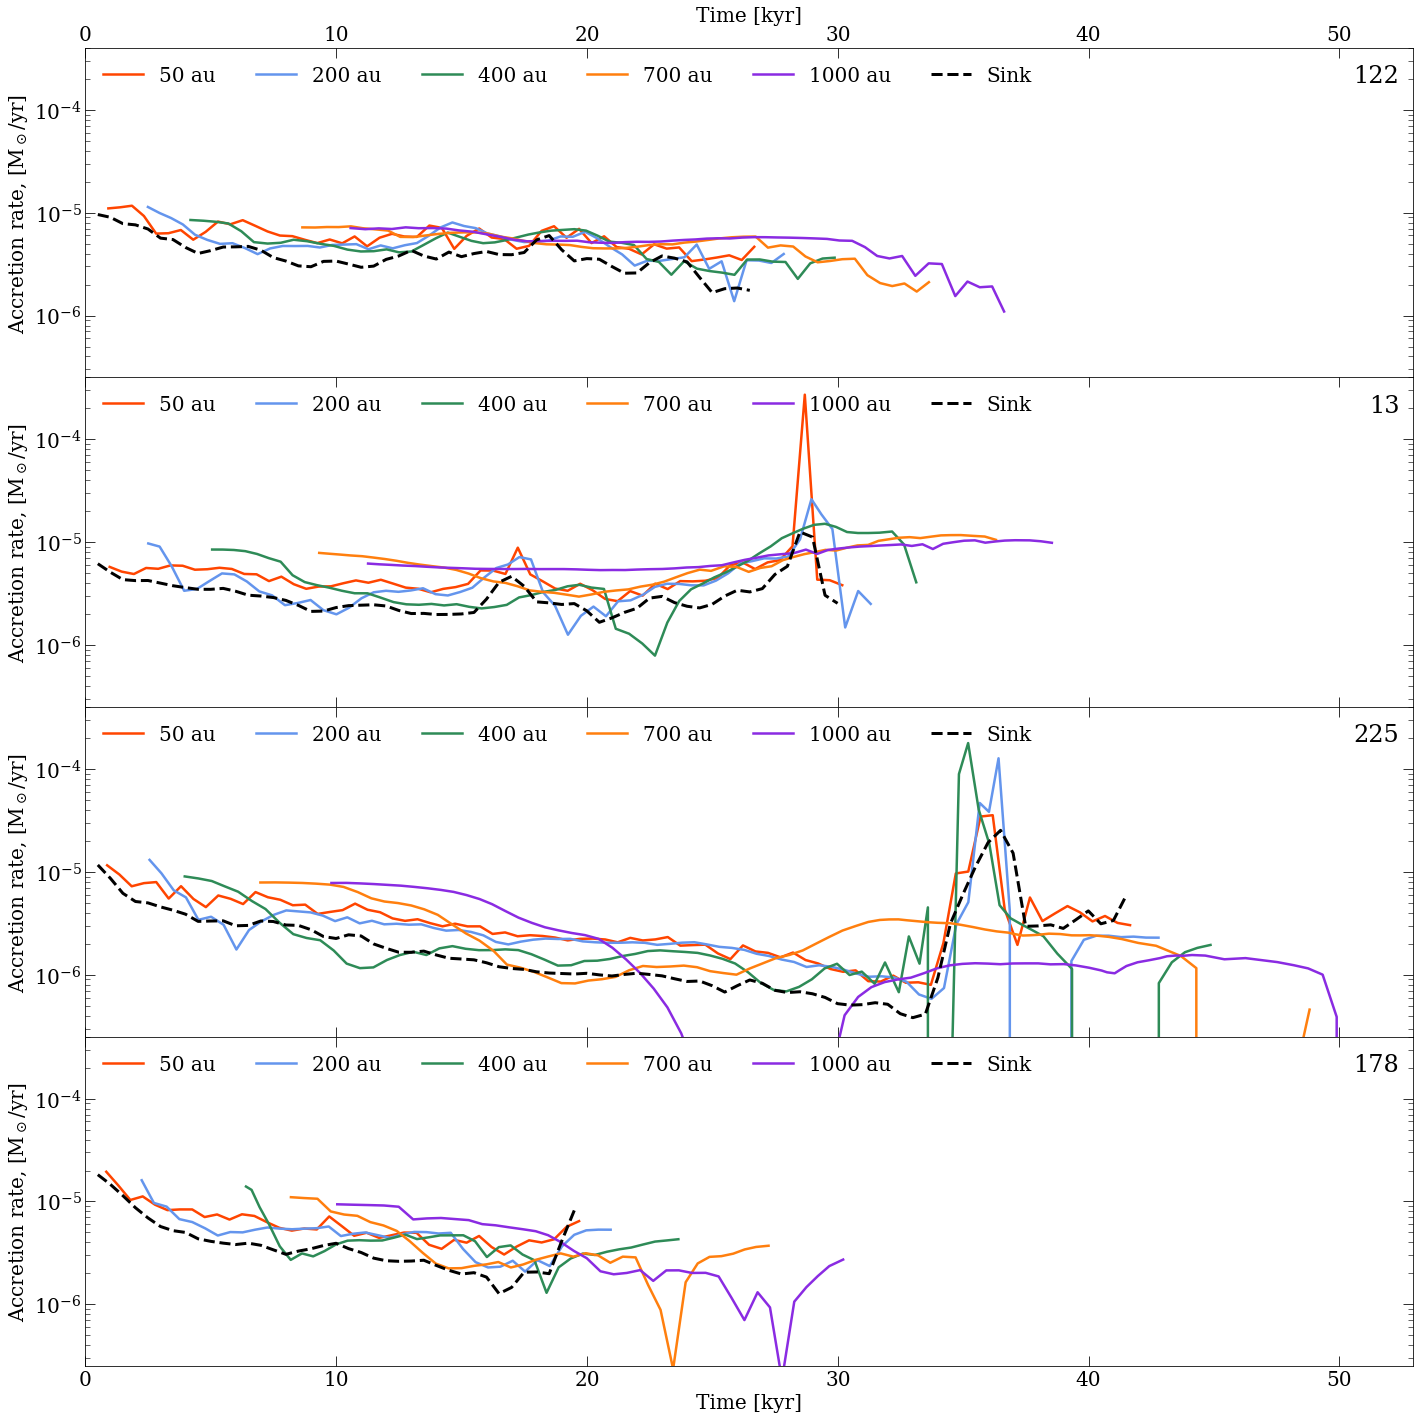

In [10]:
fig, axs = plt.subplots(len(saved_as), 1, figsize = (20, 5 * len(saved_as)))


x_max = np.array([plot_data[sink]['time'][-1] + plot_data[sink]['t_ff'][-1,-1] for sink in plot_data.keys()]).max()

for ax in axs.flatten():
    ax.set_xlabel('Time [kyr]', fontsize=20); ax.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=20), ax.set_xlim(0, x_max * 1e-3), ax.set_ylim(0.25e-6, 4e-4)
    ax.tick_params(axis='x', labelsize=20); ax.tick_params(axis='y', labelsize=20)
ax = axs[0]
ax.xaxis.tick_top(); ax.xaxis.set_label_position('top')

for ax in axs.flatten()[1:len(saved_as) - 1]:
    ax.set_xticklabels([])

for ax, sink, sink_name in zip(axs.flatten(), plot_data.keys(), sink_names):
    print(sink)
    for i, key in enumerate(list(plot_data[sink].keys())[:-4]):
        ax.semilogy((plot_data[sink]['time'] + plot_data[sink]['t_ff'][i])*1e-3, plot_data[sink][key], '-',  markersize = 3, label = f'{key} au', color = color_use[i], lw = 2.5); 
        #ax.semilogy((plot_data[sink]['time'] )*1e-3, plot_data[sink][key], '-',  markersize = 3, label = f'Infall sphere, {key} au', color = color_use[i], lw = 2.5); 
    ax.semilogy((plot_data[sink]['time'])*1e-3, plot_data[sink]['M_dot'], '--',  markersize = 3, label = 'Sink', color = 'black', lw = 3); 
    ax.tick_params(length = 5, which = 'minor'); ax.tick_params(length = 10, which = 'major')
    ax.text(0.99, 0.95, sink_name, transform=ax.transAxes, ha='right', va='top', fontsize = 24)
    ax.legend(frameon = False, ncol = len(list(plot_data[sink].keys())[:-4]) + 1, loc = 'upper left', prop = {'size':20});

#plt.suptitle('Accretion at sink and for several spheres', fontsize = 20,)
#
plt.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)